Enter from/to time periods and mySite: 1/4/2020 7/4/2020 08048000


'Average per day Table'

,Water Temp Fahrenheit,Water Temp Celcius,Air Temp Fahrenheit,Wind Speed m/h,Discharge c3/s
Date,,,,,
2020-04-03,61.622066,16.456703,40.321943,6.112040,2119.994453
2020-04-04,60.260840,15.700467,46.632770,1.674915,2167.773721
2020-04-05,62.431159,16.906200,62.299529,2.001028,2090.000000
2020-04-06,62.961428,17.200793,67.303116,1.945119,2087.500000
2020-04-07,65.037229,18.354016,79.189988,2.874255,2070.000000


'All data between time period'

,Date,Time,Water Temp Celcius,Water Temp Fahrenheit,Air Temp Fahrenheit,Wind Speed m/h,Discharge c3/s
666,2020-04-07,22:45:00,18.4,65.12,79.7,0.8,2070.0
667,2020-04-07,23:00:00,18.4,65.12,79.5,2.1,2070.0
668,2020-04-07,23:15:00,18.4,65.12,79.3,2.3,2070.0
669,2020-04-07,23:30:00,18.4,65.12,79.1,3.4,2070.0
670,2020-04-07,23:45:00,18.3,64.94,79.1,3.0,2070.0


,Min,Max,Mean,S.D
Water Temp Celcius,15.70,18.80,17.077943,0.732990
Water Temp Fahrenheit,60.26,65.84,62.740298,1.319382
Air Temp Fahrenheit,40.20,86.90,59.841878,11.883006
Wind Speed m/h,0.40,14.10,4.124888,2.475514
Discharge c3/s,1790.00,2740.00,2033.412817,171.232951


<Figure size 432x288 with 0 Axes>

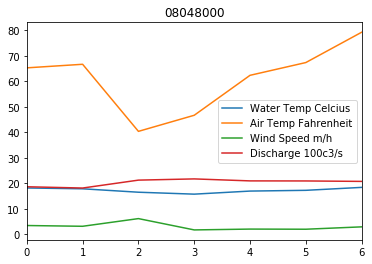

In [2]:
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from suds.client import Client


def get_input():
    user_in_fir = input("Enter from/to time periods and mySite: ").split()
    #from time period, to time period, mySite 
    return user_in_fir[0],user_in_fir[1],user_in_fir[2]

def get_timeseries_arr(Date_begin, Date_end):
    year_b,month_b,day_b,hour_b,min_b = (Date_begin.split("/"))[2],(Date_begin.split("/"))[1],(Date_begin.split("/"))[0],0,0
    year_e,month_e,day_e,hour_e,min_e = (Date_end.split("/"))[2],(Date_end.split("/"))[1],(Date_end.split("/"))[0],23,45 #data recorded every 15 mins
    #print(year_b,month_b,day_b,hour_b,min_b)
    #print(year_e,month_e,day_e,hour_e,min_e)
    start_dt = datetime(int(year_b),int(month_b),int(day_b),int(hour_b),int(min_b),0)
    end_dt = datetime(int(year_e),int(month_e),int(day_e),int(hour_e),int(min_e),0)
    index = 0
    x = start_dt
    all_time_series = []
    while not x == end_dt:
        x = x + timedelta(minutes = 15)
        all_time_series.append(x.strftime('%Y-%m-%d %H:%M:00'))
    #print(all_time_series)
    return all_time_series

def newformat(Date_begin, Date_end):
    if "/" in Date_begin:
        Date_begin_new = ((str(Date_begin).split("/"))[2]+"-"+makeday((str(Date_begin).split("/"))[1])+"-"+makeday((str(Date_begin).split("/"))[0]))
        Date_end_new = ((str(Date_end).split("/"))[2]+"-"+makeday((str(Date_end).split("/"))[1])+"-"+makeday((str(Date_end).split("/"))[0]))
    #print(Date_begin_new,Date_end_new)
    return Date_begin_new,Date_end_new
    
def makeday(num):
    if int(num) < 10:
        return'0'+num
    else:
        return num
    
    

def fill_NAN(time_Series_arr, Dict):
    Keys_arr = list(Dict.keys())
    New_Dict = {}
    for i in range(len(time_Series_arr)):
          #print("Adding")
        if not((time_Series_arr[i]) in Keys_arr):
            first,second = ((time_Series_arr[i]).split(" "))[0],((time_Series_arr[i]).split(" "))[1]
            year_b,month_b,day_b,hour_b,min_b = (first.split("-"))[0],(first.split("-"))[1],(first.split("-"))[2],(second.split(":"))[0],(second.split(":"))[1]
            Dict[datetime(int(year_b),int(month_b),int(day_b),int(hour_b),int(min_b),0).strftime('%Y-%m-%d %H:%M:%S')] = float('nan')
    for i in range(len(time_Series_arr)):
        first,second = ((time_Series_arr[i]).split(" "))[0],((time_Series_arr[i]).split(" "))[1]
        year_b,month_b,day_b,hour_b,min_b = (first.split("-"))[0],(first.split("-"))[1],(first.split("-"))[2],(second.split(":"))[0],(second.split(":"))[1]
        New_Dict[datetime(int(year_b),int(month_b),int(day_b),int(hour_b),int(min_b),0).strftime('%Y-%m-%d %H:%M:%S')] = Dict[datetime(int(year_b),int(month_b),int(day_b),int(hour_b),int(min_b),0).strftime('%Y-%m-%d %H:%M:%S')]
    return New_Dict

            
def average_data_day(dates,data):
    index =  0
    while index<(len(dates)-1):
        if(math.isnan(data[index]) and ((str(dates[index]).split())[0] == (str(dates[index+1]).split())[0])):
            del data[index]
            del dates[index]
        elif((math.isnan(data[index]) and not((str(dates[index]).split())[0] == (str(dates[index+1]).split())[0]))):
            data[index] = float('nan')
            dates[index] = (str(dates[index]).split())[0]
            index +=1
        elif ((str(dates[index]).split())[0] == (str(dates[index+1]).split())[0]):
            if(math.isnan(data[index+1])):
                del data[index+1]
                del dates[index+1]
            else:
                data[index] = (data[index]+data[index+1])/2
                dates[index] = (str(dates[index]).split())[0]
                del data[index+1]
                del dates[index+1]
        else:
            dates[index] = (str(dates[index]).split())[0]
            index +=1
    return dates,data




def average_table(site,time_Series_arr,Dict_wat_c,Dict_air_f,Dict_winspd_mh,Dict_disch_c3s):
    title_c = ["Water Temp Fahrenheit","Water Temp Celcius","Air Temp Fahrenheit","Wind Speed m/h","Discharge c3/s"]
    Data_wat_c,Data_air_f,Data_winspd_mh,Data_disch_c3s = [],[],[],[]
    keys_wat_c,keys_air_f,keys_winspd_mh,keys_disch_c3s = [],[],[],[]
    time_wat_c,time_air_f,time_winspd_mh,time_disch_c3s = [],[],[],[]
    Data_wat_f,keys_wat_f = [],[]
    
    for i in time_Series_arr:
        keys_wat_c.append((i.split())[0])
        keys_air_f.append((i.split())[0])
        keys_winspd_mh.append((i.split())[0])
        keys_disch_c3s.append((i.split())[0])
        
        Data_wat_c.append(Dict_wat_c[i])
        Data_air_f.append(Dict_air_f[i])
        Data_winspd_mh.append(Dict_winspd_mh[i])
        Data_disch_c3s.append(Dict_disch_c3s[i])
        
        keys_wat_f.append((i.split())[0])
        Data_wat_f.append(Dict_wat_c[i]*9/5+32)
        
    tot_wat_f = []
    tot_wat_c = [x for x in Data_wat_c]
    for i in range(len(tot_wat_c)):
        tot_wat_f.append(float(tot_wat_c[i])*9/5+32)
    tot_air_f = [x for x in Data_air_f]
    tot_winspd_mh = [x for x in Data_winspd_mh]
    tot_disch_c3s = [x for x in Data_disch_c3s]
    
    
    avg_wat_f = average_data_day(keys_wat_f,Data_wat_f)
    avg_wat_c = average_data_day(keys_wat_c,Data_wat_c)
    avg_air_f = average_data_day(keys_air_f,Data_air_f)
    avg_winspd_mh = average_data_day(keys_winspd_mh,Data_winspd_mh)
    avg_disch_c3s = average_data_day(keys_disch_c3s,Data_disch_c3s)
    New_Data_disch_c3s = [x/100 for x in Data_disch_c3s]
    
    df1 = pd.DataFrame({'Date':keys_wat_f,title_c[0]:Data_wat_f}, index =keys_wat_f )
    df1 = df1.sort_values(by='Date',ascending=True)
    df2 = pd.DataFrame({'Date':keys_wat_c,title_c[1]:Data_wat_c}, index =keys_wat_c)
    df2 = df2.sort_values(by='Date',ascending=True)
    df3 = pd.DataFrame({'Date':keys_air_f,title_c[2]:Data_air_f}, index =keys_air_f)
    df3 = df3.sort_values(by='Date',ascending=True)
    df4 = pd.DataFrame({'Date':keys_winspd_mh,title_c[3]:Data_winspd_mh}, index =keys_winspd_mh)
    df5 = df4.sort_values(by='Date',ascending=True)
    df5 = pd.DataFrame({'Date':keys_disch_c3s,title_c[4]:Data_disch_c3s}, index =keys_disch_c3s)
    df5 = df5.sort_values(by='Date',ascending=True)
    df6 = pd.DataFrame({'Date':keys_disch_c3s,'Discharge 100c3/s':New_Data_disch_c3s}, index =keys_disch_c3s)
    df6 = df6.sort_values(by='Date',ascending=True)
    
    
    #keys_wat_f,Data_wat_f = zip(*sorted(zip(keys_wat_f,Data_wat_f)))
    #keys_wat_c,Data_wat_c = zip(*sorted(zip(keys_wat_c,Data_wat_c)))
    #keys_air_f,Data_air_f = zip(*sorted(zip(keys_air_f,Data_air_f)))
    #keys_winspd_mh,Data_winspd_mh = zip(*sorted(zip(keys_winspd_mh,Data_winspd_mh)))
    #keys_disch_c3s,Data_disch_c3s = zip(*sorted(zip(keys_disch_c3s,Data_disch_c3s)))
    
    frames1 = pd.merge(df1,df2, left_on='Date', right_on = 'Date',how = 'inner')
    frames2 = pd.merge(frames1,df3, left_on='Date', right_on = 'Date',how = 'inner')
    frames3 = pd.merge(frames2,df4, left_on='Date', right_on = 'Date',how = 'inner')
    frames4 = pd.merge(frames3,df5, left_on='Date', right_on = 'Date',how = 'inner')
    frames4 = frames4.set_index('Date')
    display("Average per day Table")
    display(frames4.tail())
    
    plot_table = pd.merge(frames3,df6, left_on='Date', right_on = 'Date',how = 'inner')
    plot_table = plot_table.drop(columns = 'Water Temp Fahrenheit')
    plt.figure();
    plot_table.plot(title = site);

    
    display('All data between time period')
    date = [(x.split())[0] for x in time_Series_arr]
    time = [(x.split())[1] for x in time_Series_arr]
    #display(len(date),len(time),len(tot_wat_c),len(tot_wat_f),len(tot_air_f),len(tot_winspd_mh),len(tot_disch_c3s))
    all_data_table = pd.DataFrame({'Date':date,'Time':time,title_c[1]:tot_wat_c,title_c[0]:tot_wat_f,title_c[2]:tot_air_f,title_c[3]:tot_winspd_mh,title_c[4]:tot_disch_c3s})
    display(all_data_table.tail())
    
    
    all_data_table = all_data_table.drop(columns = ['Date','Time'])
    info_tab = pd.DataFrame({'Min':all_data_table.min(),'Max':all_data_table.max(),'Mean':all_data_table.mean(),'S.D':all_data_table.std()})
    
    #min_ = all_data_table.min(level=0)
    #max_ = all_data_table.max(level=0)
    #mean = all_data_table.mean(level=0)
    #S.D = all_data_table.std(level=0)
    display(info_tab.tail())
    
    


Date_begin, Date_end, site = get_input()
time_Series_arr = get_timeseries_arr(Date_begin, Date_end)

wsdlURL = 'http://hydroportal.cuahsi.org/nwisuv/cuahsi_1_1.asmx?WSDL'
siteCode = 'NWISUV:'+site

variableCode_wat_c = 'NWISUV:00010'
variableCode_air_f = 'NWISUV:00021'
variableCode_winspd_mh = 'NWISUV:00035'
variableCode_disch_c3s = 'NWISUV:00060'

Dict_wat_c = {}
Dict_air_f = {}
Dict_winspd_mh = {} 
Dict_disch_c3s = {}


Date_begin, Date_end = newformat(Date_begin, Date_end)


# Create a new object named "NWIS" for calling the web service methods
NWIS = Client(wsdlURL).service

#Every one-quarter hour data for these dates!
response_wat_c = NWIS.GetValuesObject(siteCode, variableCode_wat_c, Date_begin, Date_end) 
response_air_f = NWIS.GetValuesObject(siteCode, variableCode_air_f, Date_begin, Date_end) 
response_winspd_mh = NWIS.GetValuesObject(siteCode, variableCode_winspd_mh, Date_begin, Date_end) 
response_disch_c3s = NWIS.GetValuesObject(siteCode, variableCode_disch_c3s, Date_begin, Date_end)


if not len(response_wat_c.timeSeries[0]) == 0:
    values_wat_c = response_wat_c.timeSeries[0].values[0].value
    if(values_wat_c):
        for v in values_wat_c:
            Dict_wat_c[(v._dateTime.strftime('%Y-%m-%d %H:%M:%S'))] = float(v.value)
            
if not len(response_air_f.timeSeries[0]) == 0:
    values_air_f = response_air_f.timeSeries[0].values[0].value
    if(values_air_f):
        for v in values_air_f:
            Dict_air_f[(v._dateTime.strftime('%Y-%m-%d %H:%M:%S'))] = float(v.value)
            
if not len(response_winspd_mh.timeSeries[0]) == 0:
    values_winspd_mh = response_winspd_mh.timeSeries[0].values[0].value
    if(values_winspd_mh):
        for v in values_winspd_mh:
            Dict_winspd_mh[(v._dateTime.strftime('%Y-%m-%d %H:%M:%S'))] = float(v.value)
            
if not len(response_disch_c3s.timeSeries[0]) == 0:
    values_disch_c3s = response_disch_c3s.timeSeries[0].values[0].value
    if(values_disch_c3s):
        for v in values_disch_c3s:
            Dict_disch_c3s[(v._dateTime.strftime('%Y-%m-%d %H:%M:%S'))] = float(v.value)


Dict_wat_c = fill_NAN(time_Series_arr, Dict_wat_c)
Dict_air_f = fill_NAN(time_Series_arr, Dict_air_f)
Dict_winspd_mh = fill_NAN(time_Series_arr, Dict_winspd_mh)
Dict_disch_c3s = fill_NAN(time_Series_arr, Dict_disch_c3s)

#print(time_Series_arr)


problem1 = average_table(site,time_Series_arr,Dict_wat_c,Dict_air_f,Dict_winspd_mh,Dict_disch_c3s)


#1/4/2020 7/4/2020 08048000
#3/5/2019 4/4/2020 04193500
#1/11/2019 1/12/2019 04193500


